In [19]:
import pandas as pd
import numpy as np
from collections import Counter
pd.options.display.max_rows=100

In [20]:
all_labels = pd.read_pickle('/home/prateekagarw_umass_edu/p_file/all_labels').replace(np.nan, '')
all_labels

,image_name,adjective_1,adjective_2,negative_adj,object_1,object_2
0,p_0.jpg,bigger,smaller,"[bluer, hairier]",dogs,
1,p_1.jpg,cleaner,dirtier,[bigger],hands,
2,p_2.jpg,hairier,balder,"[longer, thicker]",cats,
3,p_3.jpg,younger,older,"[denser, cleaner]",persons,
4,p_5.jpg,colder,hotter,"[fuller, curvier]",drinks,
...,...,...,...,...,...,...
252,k_60.jpg,fatter,skinnier,"[narrower, fancier, taller]",people,
253,k_61.jpg,nearer,farther,"[heavier, bluer, smoother]",objects,
254,k_62.jpg,shinier,duller,"[heavier, curvier, curlier]",piggybank,santa
255,k_63.jpg,fatter,skinnier,"[drier, broader, blacker]",fishes,


In [21]:
#Modeling
import pandas as pd
import os
import glob
import numpy as np
import time
import requests
import random
import matplotlib.pyplot as plt
from PIL import Image
import requests
import torch
import torch.nn as nn
from transformers import CLIPProcessor, CLIPModel
model_name = "openai/clip-vit-base-patch32"
# model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

In [22]:
#Load Adjectives (No None)
adjectives_list = all_labels['adjective_1'].tolist()
#Load Antonyms (Does have None)
antonyms_list = all_labels['adjective_2'].tolist()
#Unique Adjectives
adjectives = Counter(adjectives_list)
# adjectives.update(antonyms_list)
unique_adjectives = list(adjectives.keys())
# unique_adjectives.remove("None")
print(len(unique_adjectives))

39


In [23]:
#make a list of prompts
groundtruth_labels = [ ]
scores = [ ]
wrong_adjectives = [ ]
wrong_images = [ ]
k=10
accuracy = 0
predicted_indices = []

for idx,row in all_labels.iterrows():
  
  img_name, adjective, antonym = row['image_name'],row['adjective_1'],row['adjective_2']

  if row['object_2'] != '':
    adj_prompts_list = [f"The {row['object_1']} and {row['object_2']} in this image can be compared using: \"{k}\"" for k in unique_adjectives]
  else:
    adj_prompts_list = [f"The {row['object_1']} in this image can be compared using: \"{k}\"" for k in unique_adjectives]
    
  img_path = "/home/prateekagarw_umass_edu/p_file/all_aug/" + img_name
  img = Image.open(img_path)

  groundtruth_labels.append(unique_adjectives.index(adjective))
  
  inputs = processor(text=adj_prompts_list, images=img, return_tensors="pt", padding=True).to(device)
  outputs = model(**inputs).logits_per_image
  probs = outputs.softmax(dim=1) 
  scores.append(probs.cpu().detach().numpy())
    
  prob, idxs = probs[0].topk(10)
  top_adj_prompts = [unique_adjectives[i] for i in idxs[:k]]
    
  if adjective not in top_adj_prompts:
        wrong_adjectives.append(adjective)
        wrong_images.append(img_name)
        print(img_name, adjective, top_adj_prompts[0])
        
  # prob, idxs = probs[0].topk(39)
  # top_adj_prompts = [unique_adjectives[i] for i in idxs[:k]]
  # print("groundtruth adjective is "+ adjective + " and its antonym is " + antonym)
  # predicted_index = top_adj_prompts.index(correct_adjective)
  # avg_index += predicted_index
  # predicted_indices.append(predicted_index)
  # print(top_adj_prompts)
  # plt.figure(figsize=(8, 10))
  # plt.imshow(np.asarray(img))
  # plt.show()
 
#   if antonym!="None" and antonym in top_adj_prompts:
#     accuracy+=1
#   if adjective in top_adj_prompts:
#     accuracy+=1
#   else:
#     continue
# print(accuracy/len(img_name_list))
# print(avg_index/len(sided_df["adjective"]))

p_0.jpg bigger taller
p_1.jpg cleaner blacker
p_5.jpg colder sharper
p_7.jpg harder bluer
p_14.jpg riper fatter
p_16.jpg blacker curlier
p_17.jpg heavier nearer
p_19.jpg sharper thicker
p_20.jpg newer coarser
p_21.jpg colder harder
p_23.jpg fuller fewer
p_27.jpg shinier harder
p_29.jpg smoother narrower
p_33.jpg drier bluer
p_35.jpg coarser heavier
p_37.jpg fuller flakier
p_39.jpg bigger smoother
p_40.jpg bigger fewer
p_43.jpg fresher thicker
p_44.jpg nearer narrower
p_46.jpg flatter fresher
p_49.jpg narrower smoother
p_50.jpg narrower bluer
p_51.jpg thicker fresher
p_54.jpg fresher blacker
p_55.jpg higher coarser
p_56.jpg higher fewer
p_59.jpg sharper harder
p_62.jpg rustier bluer
p_65.jpg blacker thicker
p_67.jpg narrower fatter
p_69.jpg smoother coarser
p_72.jpg thicker riper
p_75.jpg heavier coarser
p_78.jpg brighter thicker
p_80.jpg fewer heavier
p_81.jpg flakier bigger
p_82.jpg clearer thicker
p_84.jpg fuller coarser
p_86.jpg sharper coarser
l_1.jpg curvier bigger
l_6.jpg fuller 

In [24]:
adjective_error_analysis = Counter(wrong_adjectives)
print(adjective_error_analysis)

Counter({'bigger': 10, 'fuller': 9, 'nearer': 8, 'narrower': 7, 'higher': 7, 'blacker': 5, 'sharper': 5, 'smoother': 5, 'fresher': 5, 'thicker': 5, 'colder': 4, 'brighter': 4, 'broader': 4, 'cleaner': 3, 'heavier': 3, 'rustier': 3, 'clearer': 3, 'deeper': 3, 'harder': 2, 'riper': 2, 'newer': 2, 'shinier': 2, 'drier': 2, 'flatter': 2, 'fewer': 2, 'flakier': 2, 'longer': 2, 'darker': 2, 'fatter': 2, 'fancier': 2, 'denser': 2, 'coarser': 1, 'curvier': 1, 'younger': 1, 'curlier': 1, 'bluer': 1, 'hairier': 1, 'taller': 1})


1 0.12062256809338522
3 0.26848249027237353
5 0.3540856031128405
10 0.5097276264591439
15 0.6770428015564203
20 0.7665369649805448
25 0.8793774319066148
30 0.9377431906614786
35 0.980544747081712


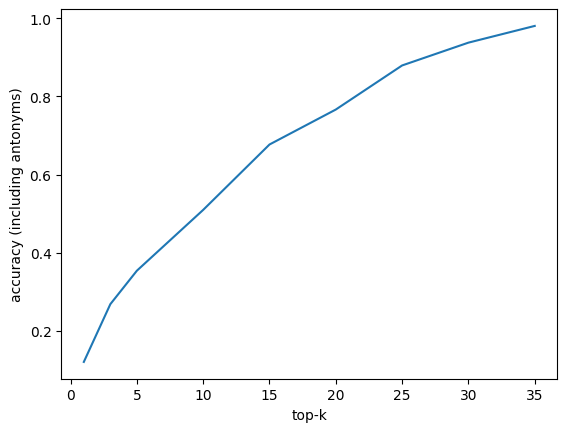

In [25]:
scores_np = np.asarray(scores).squeeze(1)
from sklearn.metrics import top_k_accuracy_score
k_s = [1,3,5,10,15,20,25,30,35]
k_scores = [ ]
for k in k_s:
  k_score = top_k_accuracy_score(np.array(groundtruth_labels),np.asarray(scores).squeeze(1),k = k)
  print(str(k) +" "+ str(k_score))
  k_scores.append(k_score)

k_scores = np.array(k_scores)
np.save('wObjectsScores',k_scores)

plt.plot(k_s,k_scores)
plt.xlabel("top-k")
plt.ylabel("accuracy (including antonyms)")
plt.show()